# Adherence or not

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_master = pd.read_csv("/content/master.csv")

In [ ]:
df_master = df_master.drop(columns=["Unnamed: 0"])

In [ ]:
df_master["MEDICATION_COUNT"].describe()

count    1171.000000
mean       36.711358
std       141.420814
min         0.000000
25%         3.000000
50%         7.000000
75%        31.000000
max      3313.000000
Name: MEDICATION_COUNT, dtype: float64

In [ ]:
df_master["ADHERENCE"]=df_master["MEDICATION_COUNT"].apply(lambda x: 0 if x>=15 else 1)

In [ ]:
df_master["ADHERENCE"].describe()

count    1171.000000
mean        0.629377
std         0.483178
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ADHERENCE, dtype: float64

In [ ]:
df_master.head()

,ID,BIRTHYEAR,AGE,MARITAL,RACE,ETHNICITY,GENDER,STATE,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,MEDICATION_COUNT,ADHERENCE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,32,M,white,hispanic,M,Massachusetts,Chicopee,Hampden County,271227.08,1334.88,2,1
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,38,M,white,nonhispanic,M,Massachusetts,Somerville,Middlesex County,793946.01,3204.49,1,1
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992,29,M,white,nonhispanic,M,Massachusetts,Chicopee,Hampden County,574111.90,2606.40,3,1
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,43,M,white,nonhispanic,F,Massachusetts,Lowell,Middlesex County,935630.30,8756.19,7,1
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996,25,NaN,white,nonhispanic,M,Massachusetts,Boston,Suffolk County,598763.07,3772.20,1,1


In [ ]:
df_master.to_csv("/content/df_master_processed.csv",index=False)

# General stuff

In [ ]:
print("Total heathcare expenses : ",sum(df_master["HEALTHCARE_EXPENSES"]))

Total heathcare expenses :  895745796.3700001


In [ ]:
print("Total heathcare expenses covered by insurance: ",sum(df_master["HEALTHCARE_COVERAGE"]))

Total heathcare expenses covered by insurance:  15144235.590000007


# AGE vs ADHERENCE 

In [ ]:
df_master =pd.read_csv("/content/df_master_processed.csv")

In [ ]:
df_master.head()

,ID,BIRTHYEAR,AGE,MARITAL,RACE,ETHNICITY,GENDER,STATE,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,MEDICATION_COUNT,ADHERENCE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,32,M,white,hispanic,M,Massachusetts,Chicopee,Hampden County,271227.08,1334.88,2,1
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,38,M,white,nonhispanic,M,Massachusetts,Somerville,Middlesex County,793946.01,3204.49,1,1
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992,29,M,white,nonhispanic,M,Massachusetts,Chicopee,Hampden County,574111.90,2606.40,3,1
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,43,M,white,nonhispanic,F,Massachusetts,Lowell,Middlesex County,935630.30,8756.19,7,1
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996,25,NaN,white,nonhispanic,M,Massachusetts,Boston,Suffolk County,598763.07,3772.20,1,1


In [ ]:
# patient distribution according to age
total_patients = len(df_master)
below_18 = sum(df_master["AGE"]<18)
between_18_and_25 = sum(df_master["AGE"]<45)-below_18
above_45 = total_patients - sum(df_master["AGE"]<45)
print("Total Patients - ",total_patients)
print("Below 18 - ",below_18)
print("Between 18 and 25 - ",between_18_and_25)
print("Above 45 - ",above_45)
print("Sanity check - ",below_18+between_18_and_25+above_45==total_patients)

2021-11-16 09:42:45.379 NumExpr defaulting to 2 threads.


Total Patients -  1171
Below 18 -  218
Between 18 and 25 -  396
Above 45 -  557
Sanity check -  True


In [ ]:
# adherence distribution
total_adherence = sum(df_master["ADHERENCE"])
below_18_adherence = sum(df_master[df_master["AGE"]<18]["ADHERENCE"])
between_18_and_45_adherence = sum(df_master[df_master["AGE"]<45]["ADHERENCE"])-below_18_adherence
above_45_adherence = total_adherence - sum(df_master[df_master["AGE"]<45]["ADHERENCE"])
print("Total adherence : ",total_adherence)
print("below 18 adherence : ",below_18_adherence) 
print("between 18 and 45 adherence : ",between_18_and_45_adherence) 
print("above 45 adherence: ",above_45_adherence) 

Total adherence :  737
below 18 adherence :  200
between 18 and 45 adherence :  292
above 45 adherence:  245


In [ ]:
# non-adherence

total_nonadherence = total_patients - total_adherence
nonadherence_below_18 = below_18 - below_18_adherence
nonadherence_between_18_and_45 = between_18_and_25 - between_18_and_45_adherence
nonadherence_above_45 = above_45 - above_45_adherence

print("Total nonadherence : ",total_nonadherence)
print("below 18 nonadherence : ",nonadherence_below_18) 
print("between 18 and 45 nonadherence : ",nonadherence_between_18_and_45) 
print("above 45 nonadherence: ",nonadherence_above_45) 

Total nonadherence :  434
below 18 nonadherence :  18
between 18 and 45 nonadherence :  104
above 45 nonadherence:  312


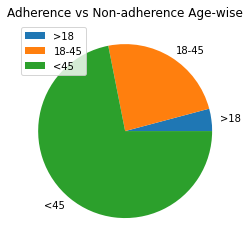

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_pie_chart(label,y,title):
  y = np.array(y)
  plt.pie(y, labels = label)
  plt.title(title)
  plt.legend()
  plt.show()

# Non adherance division among age groups
get_pie_chart([">18","18-45","<45"],
              [nonadherence_below_18,nonadherence_between_18_and_45,nonadherence_above_45],
              "Adherence vs Non-adherence Age-wise")


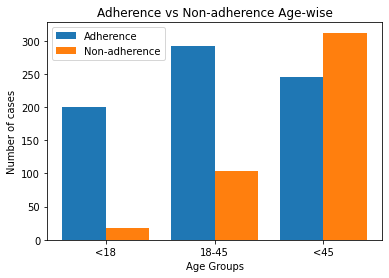

In [ ]:
# bar chart distribution of adherence and non-adherence between different age group
X = ['<18','18-45','<45']
adh= [below_18_adherence,between_18_and_45_adherence,above_45_adherence]
nonadh = [nonadherence_below_18,nonadherence_between_18_and_45,nonadherence_above_45]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
plt.xticks(X_axis, X)
plt.xlabel("Age Groups")
plt.ylabel("Number of cases")
plt.title("Adherence vs Non-adherence Age-wise")
plt.legend()
plt.show()

# GENDER VS ADHERENCE

In [ ]:
df_master["GENDER"].value_counts()

F    609
M    562
Name: GENDER, dtype: int64

In [ ]:
total_samples = total_patients - sum(df_master["GENDER"].isnull())
total_males = len(df_master[df_master["GENDER"]=="M"])
total_females = len(df_master[df_master["GENDER"]=="F"])
male_adherence = sum(df_master[df_master["GENDER"]=="M"]["ADHERENCE"])
female_adherence = sum(df_master[df_master["GENDER"]=="F"]["ADHERENCE"])
male_non_adherence = total_males-male_adherence
female_non_adherence = total_females - female_adherence
print("Total known genders : ",total_samples)
print("Total non-adherence : ",total_nonadherence)
print("Total males : ",total_males)
print("Total females : ",total_females)
print("Total male non-adherence : ",male_non_adherence)
print("Total female non-adherence : ",female_non_adherence)
print("Total male adherence : ",male_adherence)
print("Total female adherence : ",female_adherence)

Total known genders :  1171
Total non-adherence :  434
Total males :  562
Total females :  609
Total male non-adherence :  214
Total female non-adherence :  220
Total male adherence :  348
Total female adherence :  389


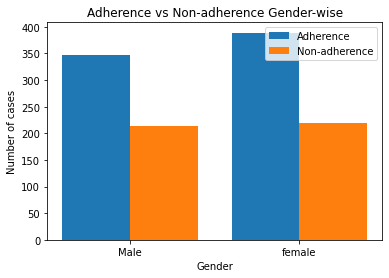

In [ ]:
# bar chart distribution of adherence and non-adherence between different male and female
X = ['Male','female']
adh= [male_adherence,female_adherence]
nonadh = [male_non_adherence,female_non_adherence]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
plt.xticks(X_axis, X)
plt.xlabel("Gender")
plt.ylabel("Number of cases")
plt.title("Adherence vs Non-adherence Gender-wise")
plt.legend()
plt.show()

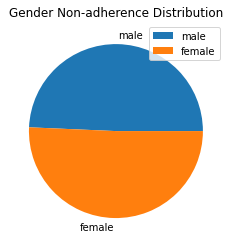

In [ ]:
get_pie_chart(["male","female"],[male_non_adherence,female_non_adherence],"Gender Non-adherence Distribution")

# MARITAL VS  ADHERENCE

In [ ]:
df_master["MARITAL"].value_counts()

M    638
S    153
Name: MARITAL, dtype: int64

In [ ]:
total_marital = total_patients - sum(df_master["MARITAL"].isnull())
married = len(df_master[df_master["MARITAL"]=="M"])
single = len(df_master[df_master["MARITAL"]=="S"])
married_adherence = sum(df_master[df_master["MARITAL"]=="M"]["ADHERENCE"])
single_adherence = sum(df_master[df_master["MARITAL"]=="S"]["ADHERENCE"])
married_non_adherence = married-married_adherence
single_non_adherence = single - single_adherence
print("Total known samples : ",total_marital)
print("Total non-adherence : ",total_nonadherence)
print("Total married : ",married)
print("Total single : ",single)
print("Total married non-adherence : ",married_non_adherence)
print("Total single non-adherence : ",single_non_adherence)
print("Total married adherence : ",married_adherence)
print("Total single adherence : ",single_adherence)

Total known samples :  791
Total non-adherence :  434
Total married :  638
Total single :  153
Total married non-adherence :  312
Total single non-adherence :  80
Total married adherence :  326
Total single adherence :  73


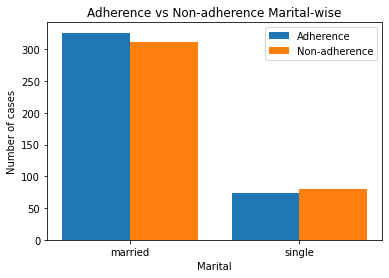

In [ ]:
# bar chart distribution of adherence and non-adherence between different married and single
X = ['married','single']
adh= [married_adherence,single_adherence]
nonadh = [married_non_adherence,single_non_adherence]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
plt.xticks(X_axis, X)
plt.xlabel("Marital")
plt.ylabel("Number of cases")
plt.title("Adherence vs Non-adherence Marital-wise")
plt.legend()
plt.show()

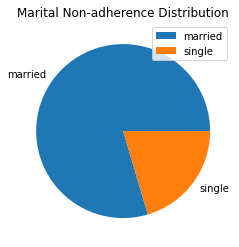

In [ ]:
get_pie_chart(["married","single"],[married_non_adherence,single_non_adherence],"Marital Non-adherence Distribution")

# RACE VS ADHERENCE

In [ ]:
dict(df_master["RACE"].value_counts())

{'white': 965, 'black': 101, 'asian': 90, 'native': 13, 'other': 2}

In [ ]:
non_adherence_race = {}
adherence_race={}

total_race= dict(df_master["RACE"].value_counts())

for race in total_race.keys():
  adherence_race[race]= sum(df_master[df_master["RACE"]==race]["ADHERENCE"])
  non_adherence_race[race]=total_race[race]-adherence_race[race]

print("total race : ",total_race)
print("total non_adherence_race : ",non_adherence_race)
print("total adherence_race : ",adherence_race)

total race :  {'white': 965, 'black': 101, 'asian': 90, 'native': 13, 'other': 2}
total non_adherence_race :  {'white': 343, 'black': 43, 'asian': 36, 'native': 11, 'other': 1}
total adherence_race :  {'white': 622, 'black': 58, 'asian': 54, 'native': 2, 'other': 1}


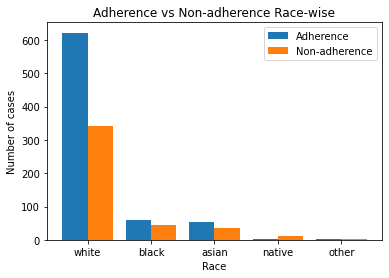

In [ ]:
# bar chart distribution of adherence and non-adherence between different races
X = list(total_race.keys())
adh= list(adherence_race.values())
nonadh = list(non_adherence_race.values())
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
plt.xticks(X_axis, X)
plt.xlabel("Race")
plt.ylabel("Number of cases")
plt.title("Adherence vs Non-adherence Race-wise")
plt.legend()
plt.show()

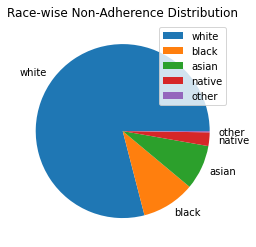

In [ ]:
get_pie_chart(list(total_race.keys()),list(non_adherence_race.values()),"Race-wise Non-Adherence Distribution")

# ETHNICITY vs ADHERENCE

In [ ]:
df_master["ETHNICITY"].value_counts()

nonhispanic    1058
hispanic        113
Name: ETHNICITY, dtype: int64

In [ ]:
non_adherence_eth = {}
adherence_eth={}

total_eth= dict(df_master["ETHNICITY"].value_counts())

for eth in total_eth.keys():
  adherence_eth[eth]= sum(df_master[df_master["ETHNICITY"]==eth]["ADHERENCE"])
  non_adherence_eth[eth]=total_eth[eth]-adherence_eth[eth]

print("total eth : ",total_eth)
print("total non_adherence_eth : ",non_adherence_eth)
print("total adherence_eth : ",adherence_eth)

total eth :  {'nonhispanic': 1058, 'hispanic': 113}
total non_adherence_eth :  {'nonhispanic': 403, 'hispanic': 31}
total adherence_eth :  {'nonhispanic': 655, 'hispanic': 82}


In [ ]:
def show_bar(total,adherence,non_adherence,label):
  X = list(total.keys())
  adh= list(adherence.values())
  nonadh = list(non_adherence.values())
  
  X_axis = np.arange(len(X))
  
  plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
  plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
  plt.xticks(X_axis, X)
  plt.xlabel(label)
  plt.ylabel("Number of cases")
  plt.title("Adherence vs Non-adherence {}-wise".format(label))
  plt.legend()
  plt.show()

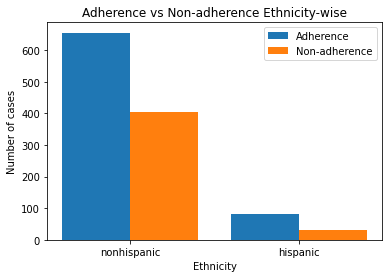

In [ ]:
show_bar(total_eth,adherence_eth,non_adherence_eth,"Ethnicity")

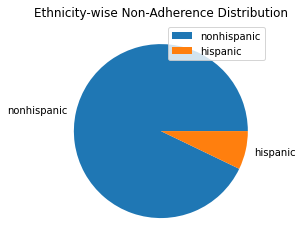

In [ ]:
get_pie_chart(list(total_eth.keys()),list(non_adherence_eth.values()),"Ethnicity-wise Non-Adherence Distribution")

# COUNTY VS ADHERENCE

In [ ]:
def show_bar(total,adherence,non_adherence,label):
  X = list(total.keys())
  adh= list(adherence.values())
  nonadh = list(non_adherence.values())
  
  X_axis = np.arange(len(X))
  
  plt.bar(X_axis - 0.2, adh, 0.4, label = 'Adherence')
  plt.bar(X_axis + 0.2, nonadh, 0.4, label = 'Non-adherence')
  
  plt.xticks(X_axis, X)
  plt.xlabel(label)
  plt.xticks(rotation=90)
  plt.ylabel("Number of cases")
  plt.title("Adherence vs Non-adherence {}-wise".format(label))
  #plt.legend()
  plt.show()

In [ ]:
def get_pie_chart(label,y,title):
  y = np.array(y)
  plt.pie(y, labels = label)
  plt.title(title)
  #plt.legend()
  plt.show()

total city :  {'Middlesex County': 255, 'Worcester County': 150, 'Suffolk County': 132, 'Norfolk County': 128, 'Essex County': 115, 'Bristol County': 105, 'Hampden County': 80, 'Plymouth County': 78, 'Barnstable County': 47, 'Hampshire County': 35, 'Berkshire County': 24, 'Franklin County': 15, 'Dukes County': 5, 'Nantucket County': 2}
total non_adherence_city :  {'Middlesex County': 95, 'Worcester County': 52, 'Suffolk County': 45, 'Norfolk County': 50, 'Essex County': 41, 'Bristol County': 37, 'Hampden County': 26, 'Plymouth County': 27, 'Barnstable County': 25, 'Hampshire County': 17, 'Berkshire County': 8, 'Franklin County': 6, 'Dukes County': 4, 'Nantucket County': 1}
total adherence_city :  {'Middlesex County': 160, 'Worcester County': 98, 'Suffolk County': 87, 'Norfolk County': 78, 'Essex County': 74, 'Bristol County': 68, 'Hampden County': 54, 'Plymouth County': 51, 'Barnstable County': 22, 'Hampshire County': 18, 'Berkshire County': 16, 'Franklin County': 9, 'Dukes County': 1,

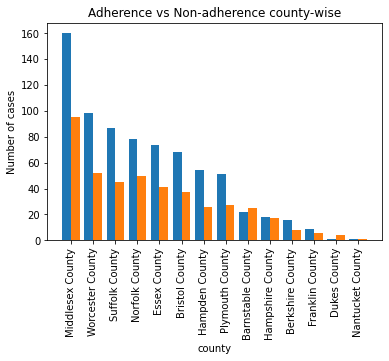

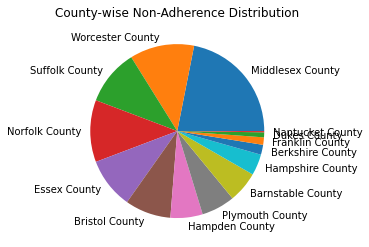

In [ ]:
non_adherence_city = {}
adherence_city={}

total_city= dict(df_master["COUNTY"].value_counts())

for city in total_city.keys():
  adherence_city[city]= sum(df_master[df_master["COUNTY"]==city]["ADHERENCE"])
  non_adherence_city[city]=total_city[city]-adherence_city[city]

print("total city : ",total_city)
print("total non_adherence_city : ",non_adherence_city)
print("total adherence_city : ",adherence_city)

show_bar(total_city,adherence_city,non_adherence_city,"county")
get_pie_chart(list(total_city.keys()),list(non_adherence_city.values()),"County-wise Non-Adherence Distribution")

In [ ]:
df_master

,ID,BIRTHYEAR,AGE,MARITAL,RACE,ETHNICITY,GENDER,STATE,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,MEDICATION_COUNT,ADHERENCE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989,32,M,white,hispanic,M,Massachusetts,Chicopee,Hampden County,271227.08,1334.88,2,1
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983,38,M,white,nonhispanic,M,Massachusetts,Somerville,Middlesex County,793946.01,3204.49,1,1
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992,29,M,white,nonhispanic,M,Massachusetts,Chicopee,Hampden County,574111.90,2606.40,3,1
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978,43,M,white,nonhispanic,F,Massachusetts,Lowell,Middlesex County,935630.30,8756.19,7,1
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996,25,NaN,white,nonhispanic,M,Massachusetts,Boston,Suffolk County,598763.07,3772.20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922,99,M,asian,hispanic,F,Massachusetts,Cambridge,Middlesex County,1622314.87,32086.31,172,0
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977,44,S,white,nonhispanic,M,Massachusetts,Beverly,Essex County,979724.25,3130.52,1,1
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914,92,S,white,nonhispanic,F,Massachusetts,Norwood,Norfolk County,1560540.35,52391.24,200,0
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914,76,M,white,nonhispanic,F,Massachusetts,Norwood,Norfolk County,1375833.47,13157.00,6,1
